In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import scipy.ndimage as ndimage
import math
from matplotlib import rcParams
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# from labellines import labelLine, labelLines

params = {'backend': 'ps',
          'font.size': 30,
          'font.family':'serif',
          'font.serif':['Helvetica'],
          'font.style': 'normal',
          'axes.labelsize': 30,
#           'text.fontsize': 30,
          'axes.linewidth': 4,
          'legend.fontsize': 12,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30,
          'text.usetex': True,
          'ps.usedistiller': 'xpdf'}

rcParams.update(params)

In [9]:
param_tag_prefix='202109090949'
param_tag_id=['0x005','0x010','0x025','0x050','0x100','0x250']
NLLData={}
for tid in param_tag_id:
    NLLData[tid]=pd.read_csv("../../RESULTS/SIGNALS/202109090949_F/nll/nll_result_signal_%s_HA%s_HH%s.txt"%(param_tag_prefix,tid,tid),'\s+')

/Users/ycwu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
cbticks={}
cbticks['0x005']=[8,10,12,14,16,18]
cbticks['0x010']=[8,10,12,14,16,18]
cbticks['0x025']=[9,12,15,18,21,24]
cbticks['0x050']=[10,14,18,22,26,30]
cbticks['0x100']=[10,14,18,22,26,30]
cbticks['0x250']=[15,18,21,24,27,30]

In [11]:
# Define Frameworks
from scipy.interpolate import bisplrep, bisplev, interp2d, LinearNDInterpolator
from matplotlib import colors
def DrawCSUpperLimit(axc,tid):
    data=NLLData[tid]
    x=data['MHA']
    y=data['MHH']
    z=data['CS']*data['MU']*1000 # fb
    zmin=min(z)
    zmax=max(z)
    print(zmin,zmax)
    ftmp=LinearNDInterpolator(list(zip(x,y)),z)
    MHA=np.linspace(500,800,100)
    MHH=np.linspace(400,700,100)
    MHA,MHH=np.meshgrid(MHA,MHH)
    z=ftmp(MHA,MHH)
    cax=axc.scatter(MHA,MHH,c=z)#,norm=colors.LogNorm())
    cb=fig.colorbar(cax,ax=axc)
    axc.set_xlabel(r'$m_A$ [GeV]')
    axc.set_ylabel(r'$m_H$ [GeV]')
    axc.set_xticks([500,600,700,800])
    axc.set_yticks([400,500,600,700])
    axc.xaxis.set_minor_locator(MultipleLocator(20))
    axc.yaxis.set_minor_locator(MultipleLocator(20))
    axc.tick_params('both', length=12, width=4, which='major',direction='in',right=True,top=True)
    axc.tick_params('both', length=6, width=4, which='minor',direction='in',right=True,top=True)
    cb.set_label(r'$\sigma$ [fb]')
    cb.set_ticks(cbticks[tid])
    axc.text(500,680,r'$\sigma(pp\to ZH)\times{\rm BR}(H\to t\bar t)$')
    axc.text(500,650,r'95\% CL Upper Bounds')
    axc.text(500,620,r'$\Gamma_{H,A}/m_{H,A} = %.1f\%%$'%(data['WR'].iloc[0]*100))

8.39086 17.389328
8.675163999999999 19.621441
9.5479877 25.43996532
11.3235194 29.6511266
11.96532792 27.340445660000004
16.46123649 28.233537300000002


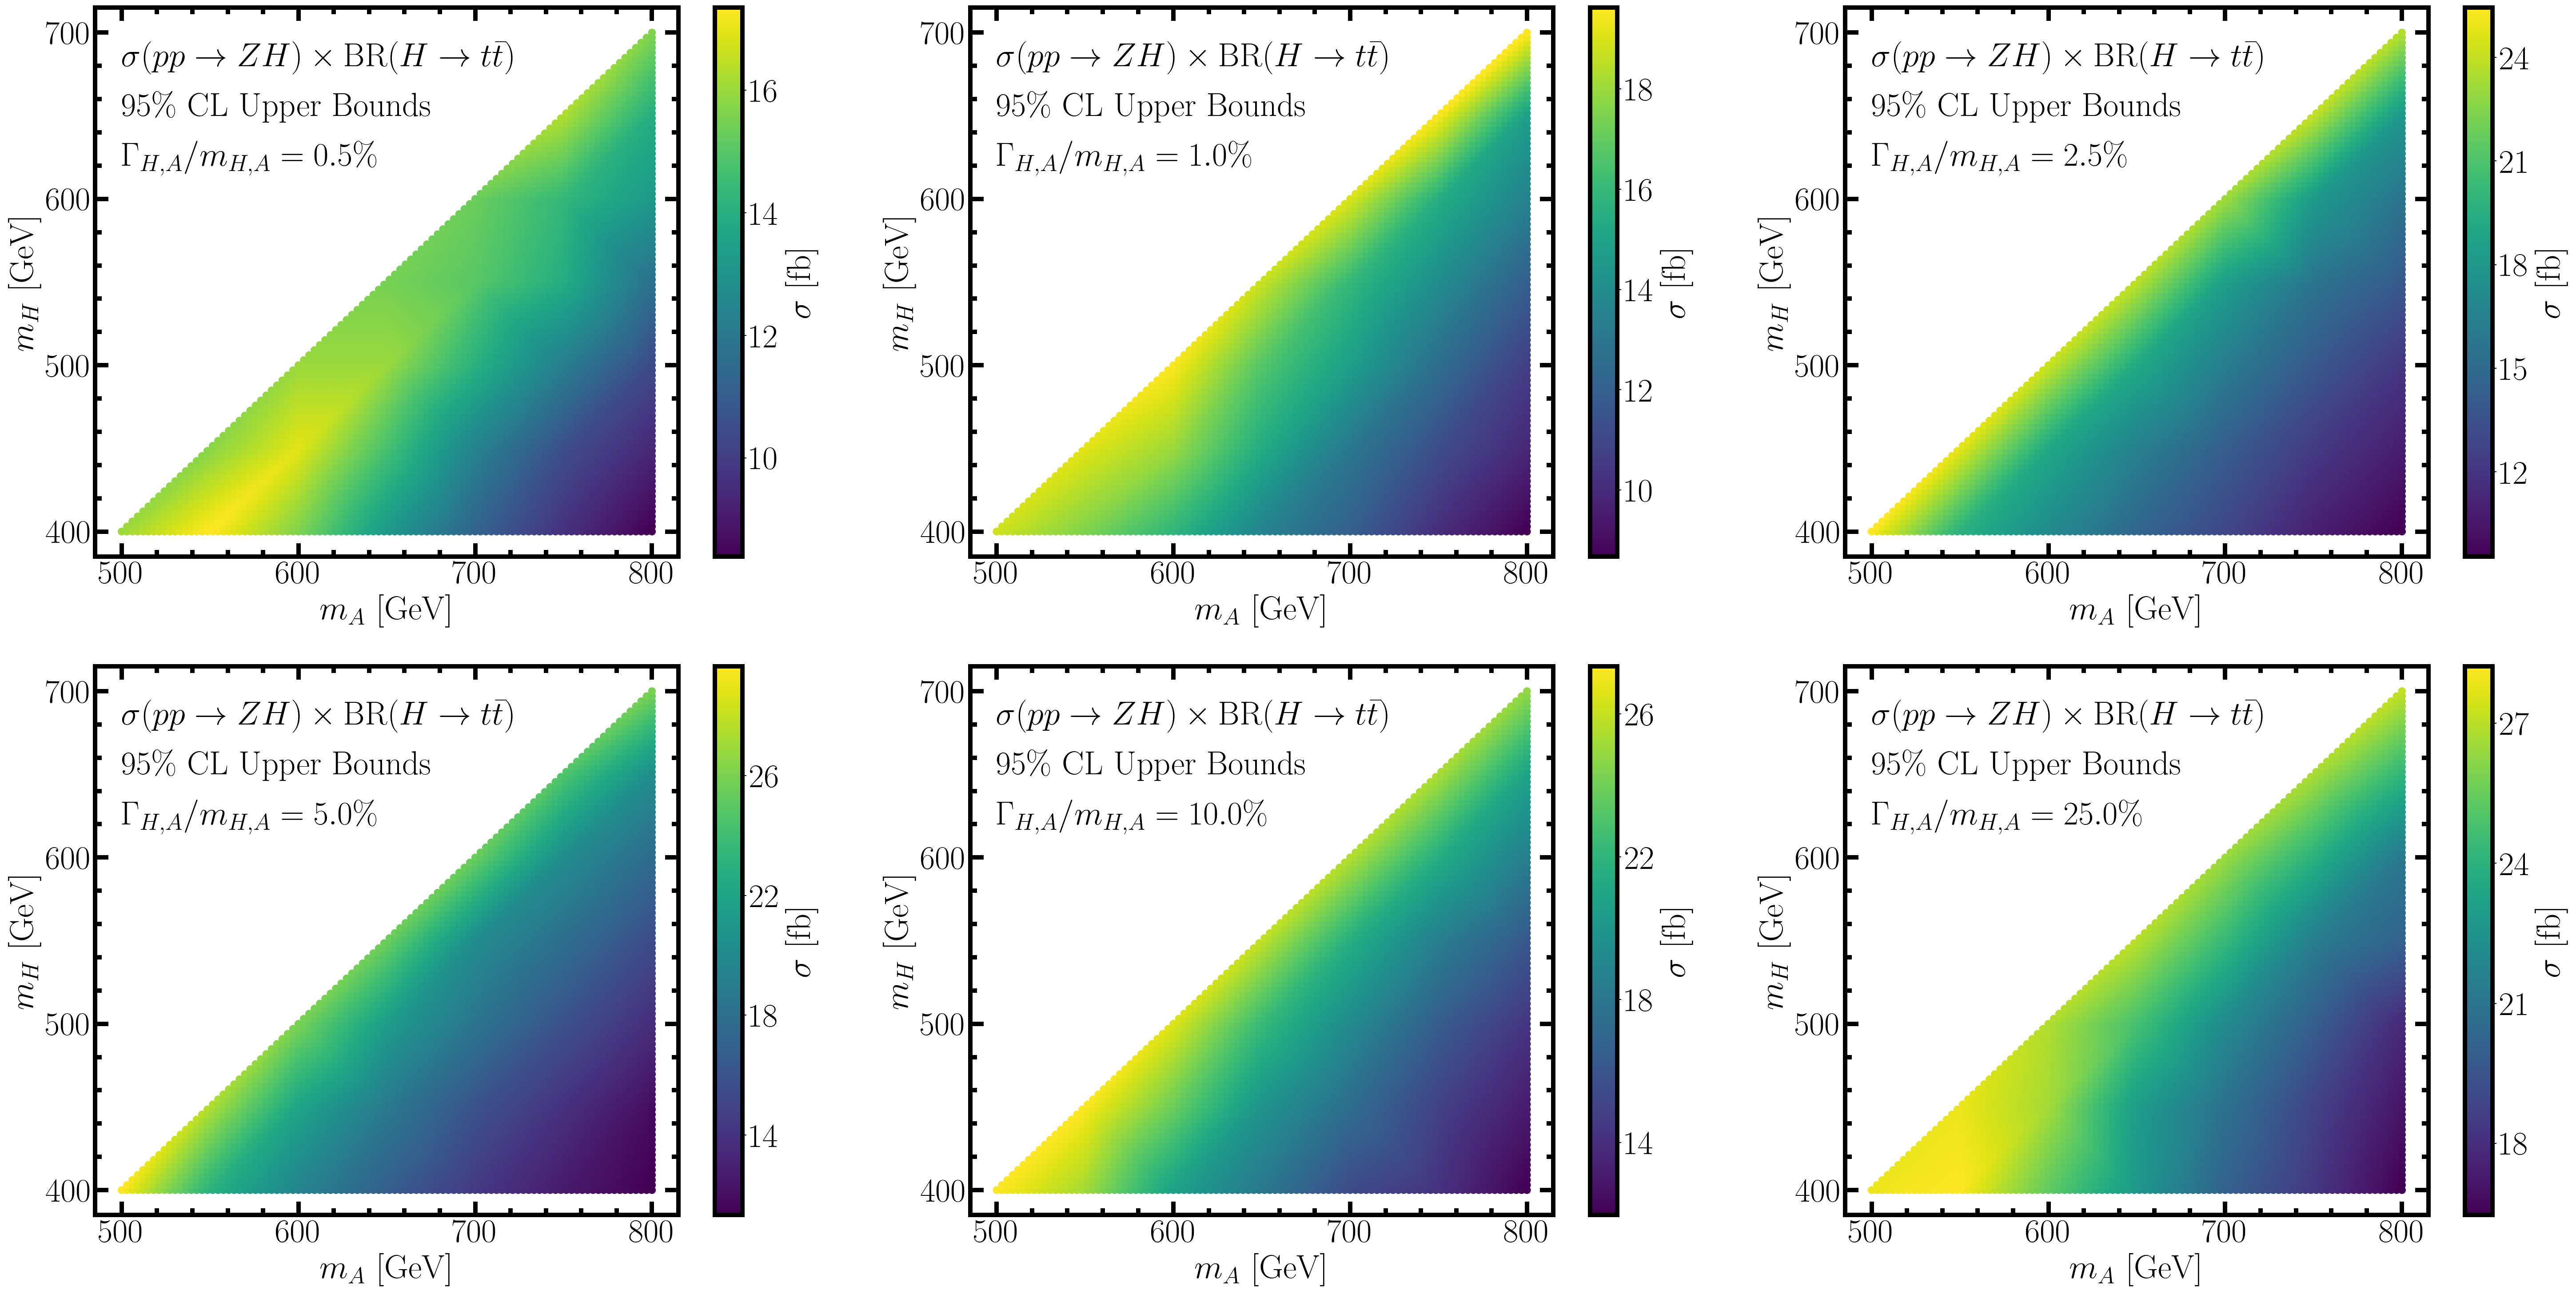

In [42]:
fig,ax=plt.subplots(2,3,figsize=(40,20),dpi=180,facecolor='white')

axc=ax[0,0]
DrawCSUpperLimit(axc,'0x005')

axc=ax[0,1]
DrawCSUpperLimit(axc,'0x010')

axc=ax[0,2]
DrawCSUpperLimit(axc,'0x025')

axc=ax[1,0]
DrawCSUpperLimit(axc,'0x050')

axc=ax[1,1]
DrawCSUpperLimit(axc,'0x100')

axc=ax[1,2]
DrawCSUpperLimit(axc,'0x250')

In [12]:
# Define Frameworks
from scipy.interpolate import bisplrep, bisplev, interp2d, LinearNDInterpolator
from matplotlib import colors
def DrawCSUpperLimitAll(axc,tid):
    data=NLLData[tid]
    x=data['MHA']
    y=data['MHH']
    z=data['CS']*data['MU']*1000 # fb
#     zmin=min(z)
#     zmax=max(z)
#     print(zmin,zmax)
    ftmp=LinearNDInterpolator(list(zip(x,y)),z)
    MHA=np.linspace(500,800,100)
    MHH=np.linspace(400,700,100)
    MHA,MHH=np.meshgrid(MHA,MHH)
    z=ftmp(MHA,MHH)
    cax=axc.scatter(MHA,MHH,c=z,vmin=8,vmax=30,rasterized=True)#,norm=colors.LogNorm())
#     cb=fig.colorbar(cax,ax=axc)
#     axc.set_xlabel(r'$m_A$ [GeV]')
#     axc.set_ylabel(r'$m_H$ [GeV]')
    axc.set_xticks([500,600,700,800])
    axc.set_yticks([400,500,600,700])
    axc.xaxis.set_minor_locator(MultipleLocator(20))
    axc.yaxis.set_minor_locator(MultipleLocator(20))
    axc.tick_params('both', length=12, width=4, which='major',direction='in',right=True,top=True)
    axc.tick_params('both', length=6, width=4, which='minor',direction='in',right=True,top=True)
#     cb.set_label(r'$\sigma$ [fb]')
#     cb.set_ticks(cbticks[tid])
    axc.text(500,680,r'$\sigma(gg\to ZH)\times{\rm BR}(H\to t\bar t)$')
    axc.text(500,650,r'95\% CL Upper Bounds')
    axc.text(500,620,r'$t_\beta = 1,\,c_{\beta-\alpha}=0$')
    axc.text(500,590,r'$\Gamma_{H,A}/m_{H,A} = %.1f\%%$'%(data['WRA'].iloc[0]*100))
    return cax

def DrawTogether(ax,fig):
    fig.subplots_adjust(wspace=0,hspace=0)
    for i in range(2):
        for j in range(3):
            axc=ax[i,j]
            tagid=i*3+j
            if i == 1:
                axc.set_xlabel(r'$m_A$ [GeV]')
            else:
                axc.set_xticklabels('')
            if j == 0:
                axc.set_ylabel(r'$m_H$ [GeV]')
            else:
                axc.set_yticklabels('')
            cax=DrawCSUpperLimitAll(axc,param_tag_id[tagid])
    cab=fig.colorbar(cax,ax=ax,location='right',shrink=1.0,pad=0.005,aspect=32)
    cab.set_label(r'$\sigma$ [fb]',fontsize=35)

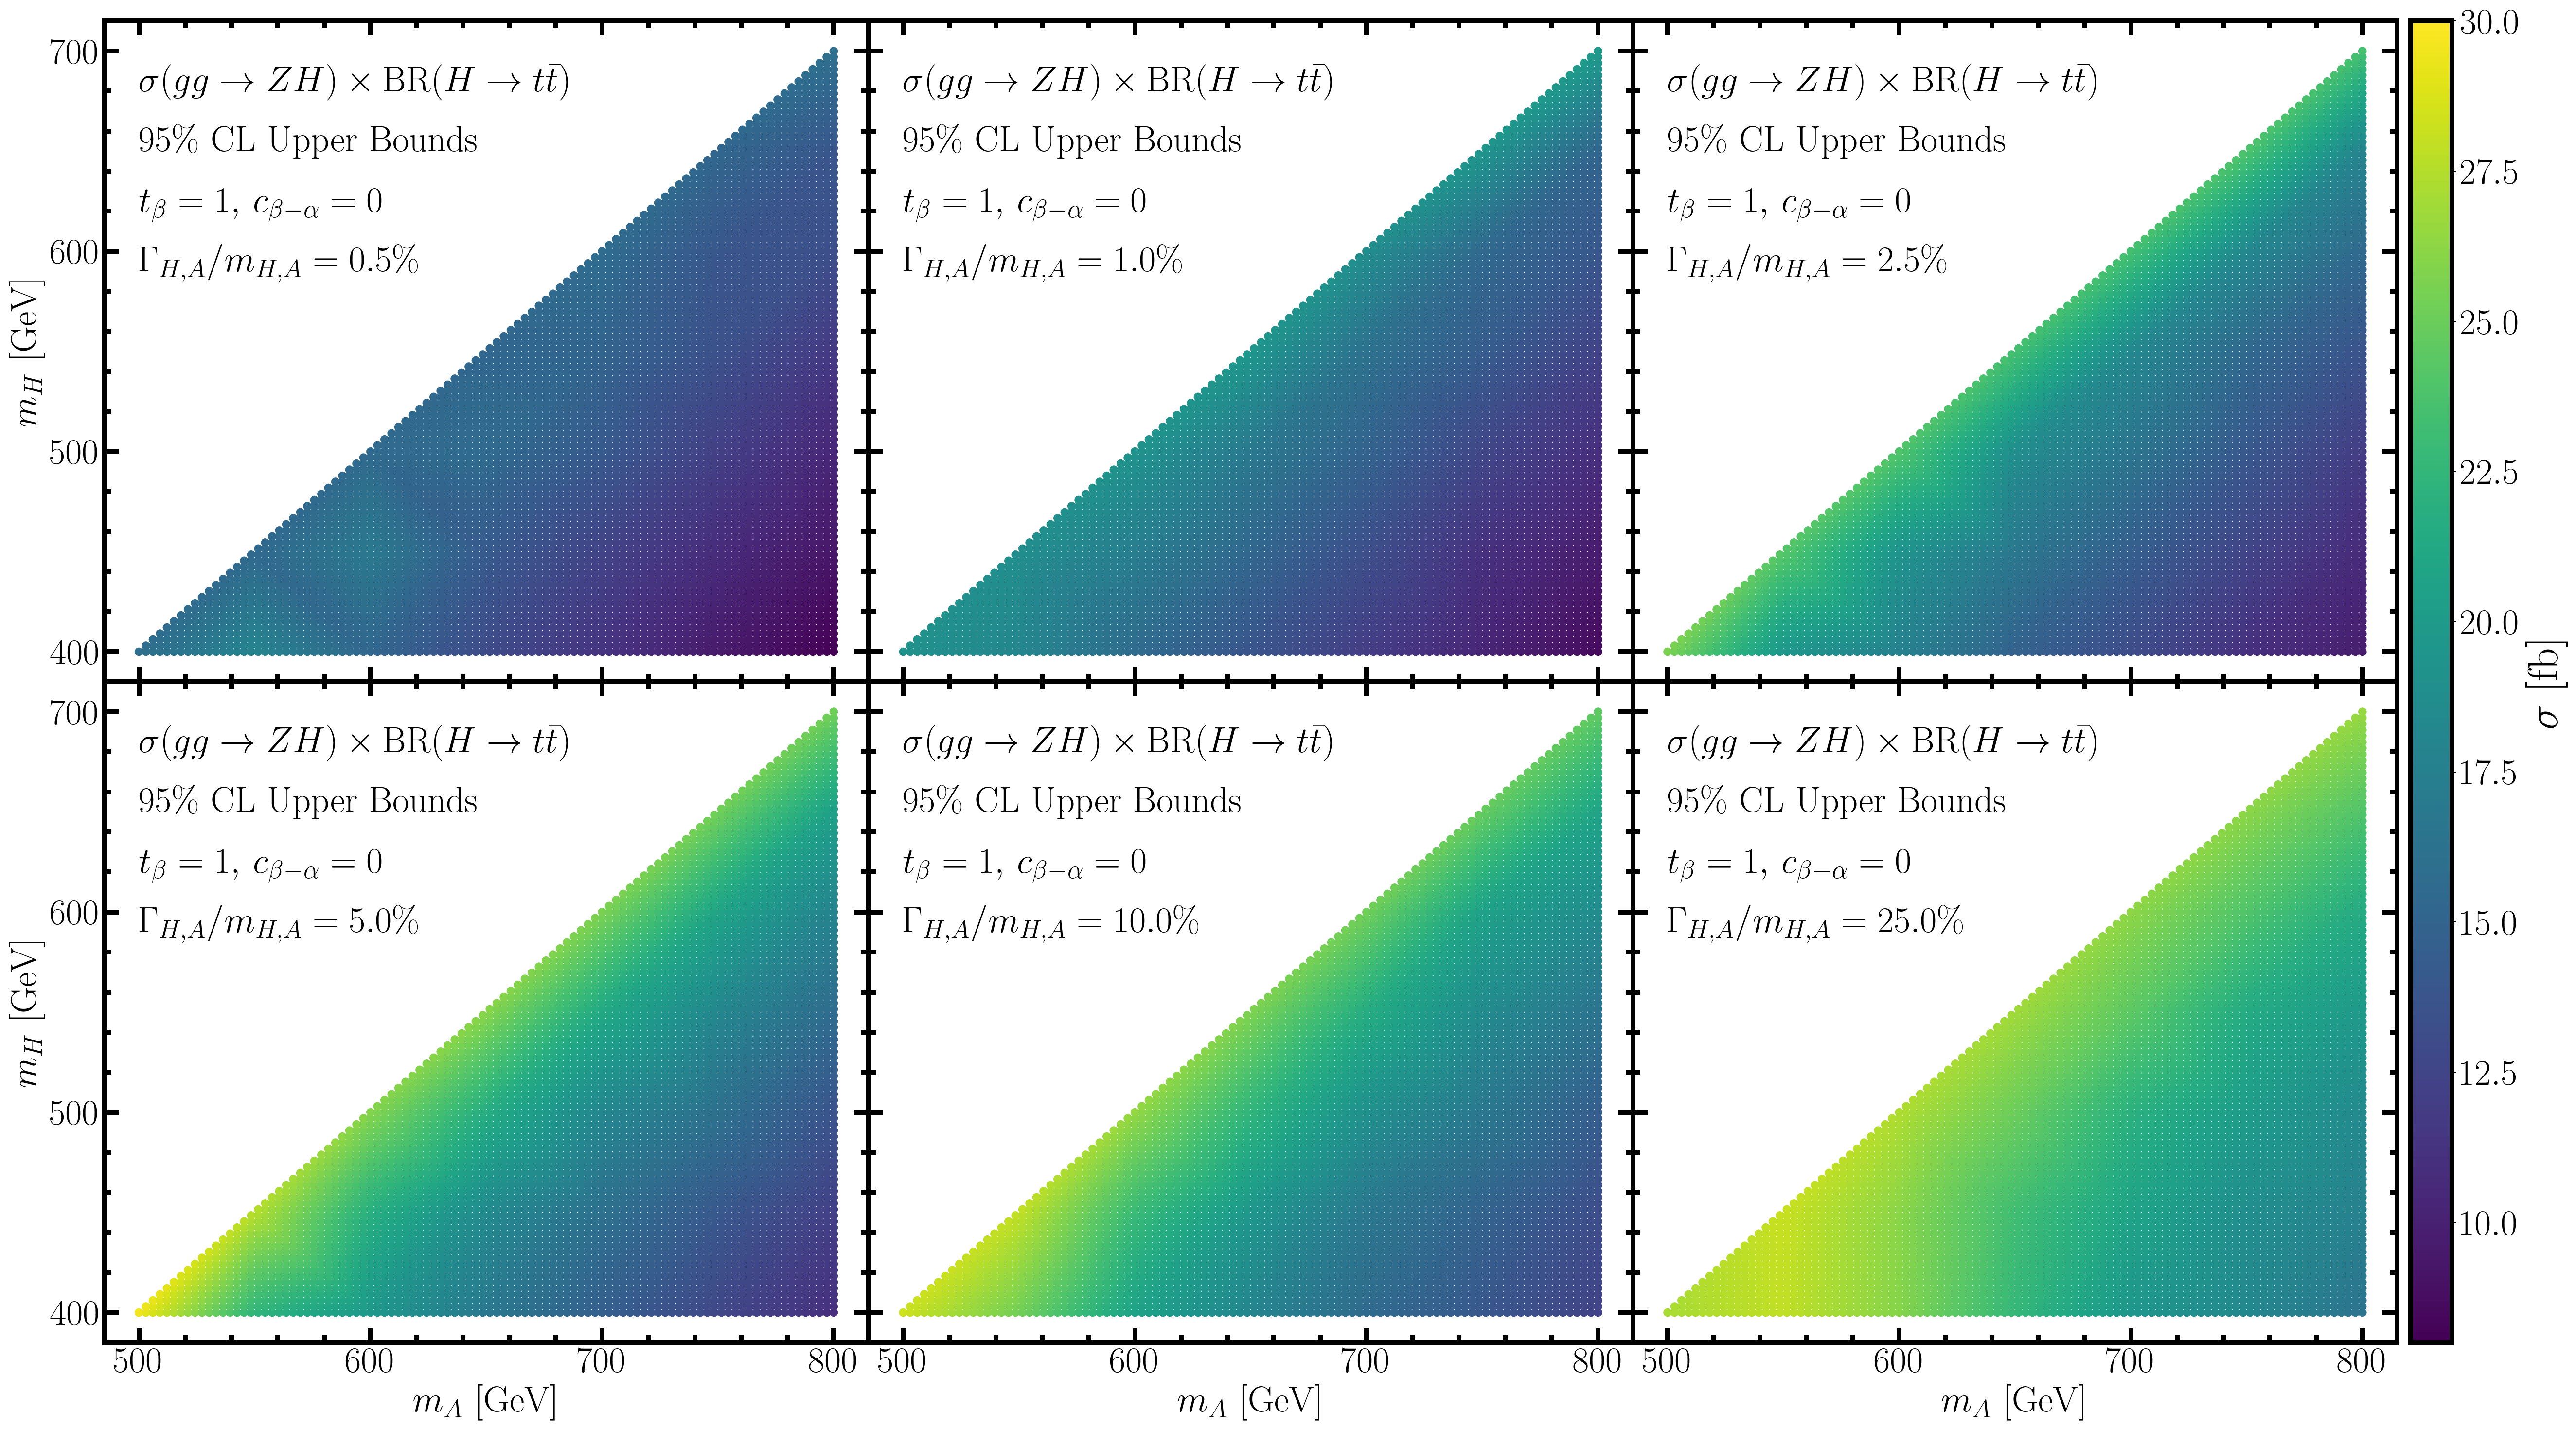

In [14]:
fig,ax=plt.subplots(2,3,figsize=(40,20),dpi=180,facecolor='white')
DrawTogether(ax,fig)
fig.savefig("signal_cs_limit_MHA_MHH.pdf",bbox_inches='tight',pad_inches=0.1)